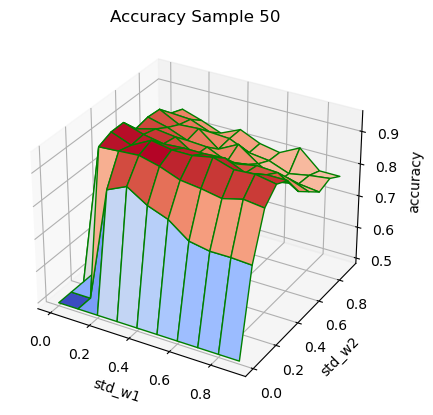

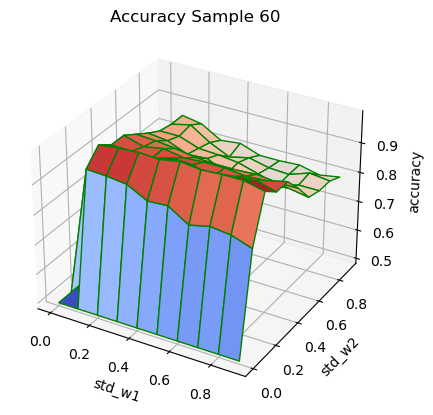

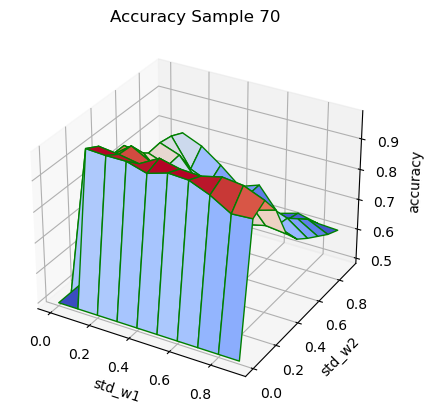

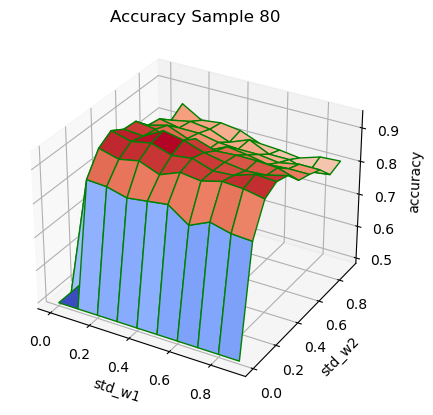

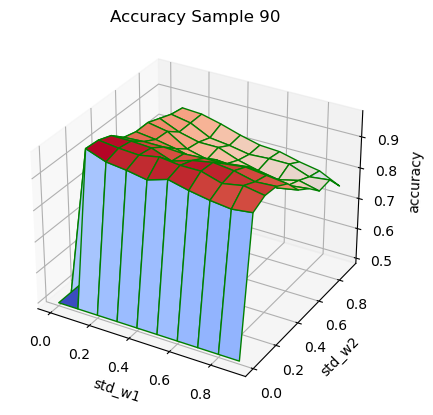

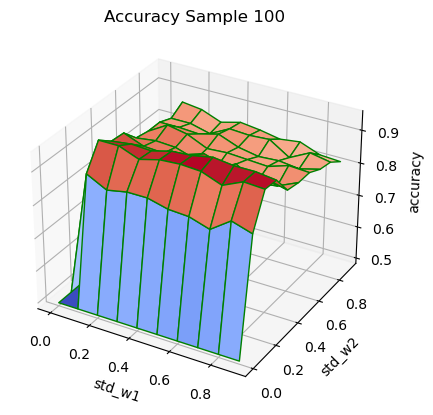

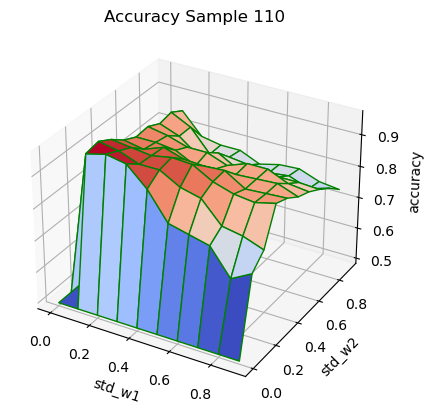

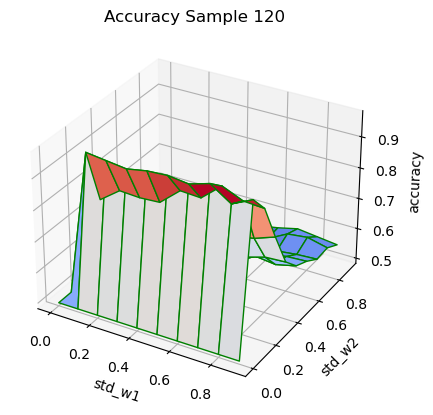

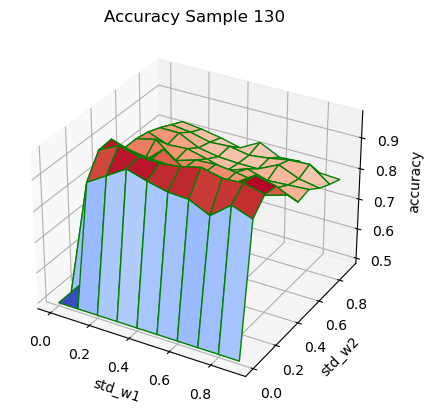

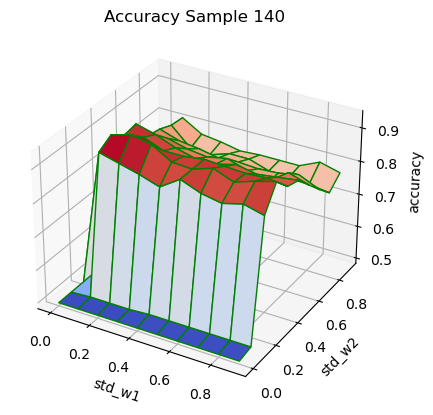

In [1]:
import numpy as np
import matplotlib.pyplot as plt

name_str='input200sample{}.npz'
sample_list = np.arange(50,150,10)
std_w_range = np.arange(0,1,0.1)
axis_std_w1 = np.arange(0, 1, 0.1)
axis_std_w2 = np.arange(0, 1, 0.1)
std_w1_axis, std_w2_axis = np.meshgrid(std_w_range,std_w_range)
accuracy_10_samples = np.zeros((10,10,10))
for (i,sample) in zip(range(len(sample_list)),sample_list):
    data = np.load(name_str.format(sample))
    fig = plt.figure()
    ax = plt.axes(projection ='3d')
    ax.plot_surface(std_w1_axis, std_w2_axis, data['accuracy_w1_w2'], cmap ='coolwarm', edgecolor ='green')
    ax.set_xlabel('std_w1')
    ax.set_ylabel('std_w2')
    ax.set_zlabel('accuracy')
    ax.set_title('Accuracy Sample {}'.format(sample))
    fig.savefig("200_inputs_accuracy_w1_w2_sample{}.png".format(sample))
    for (j,std_w1) in zip(range(len(axis_std_w1)),axis_std_w1):
        for (k,std_w2) in zip(range(len(axis_std_w2)), axis_std_w2):
            accuracy_10_samples[i][j][k]= data['accuracy_w1_w2'][j][k]


In [2]:
average_accuracy_grid_10_by_10_10_samples = np.mean(accuracy_10_samples, axis=0)
average_accuracy_grid_10_by_10_10_samples

array([[0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 ,
        0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 , 0.4921875 ],
       [0.4921875 , 0.83789062, 0.87148437, 0.87421875, 0.85820312,
        0.84960938, 0.83125   , 0.82578125, 0.815625  , 0.81601563],
       [0.4921875 , 0.92734375, 0.93046875, 0.92265625, 0.92265625,
        0.92851562, 0.92265625, 0.91679687, 0.91914063, 0.90546875],
       [0.4921875 , 0.8953125 , 0.9       , 0.89804688, 0.89648438,
        0.89921875, 0.89804688, 0.89570313, 0.90351563, 0.90546875],
       [0.4921875 , 0.87226563, 0.86289063, 0.86328125, 0.85859375,
        0.86171875, 0.859375  , 0.85078125, 0.85820312, 0.86015625],
       [0.4921875 , 0.8609375 , 0.84960938, 0.83671875, 0.82460937,
        0.82382813, 0.82890625, 0.82617188, 0.82617188, 0.81914062],
       [0.4921875 , 0.84335938, 0.83476562, 0.81679687, 0.80664062,
        0.80195313, 0.80898437, 0.80117187, 0.80546875, 0.79570312],
       [0.4921875 , 0.83359375, 0.8171875

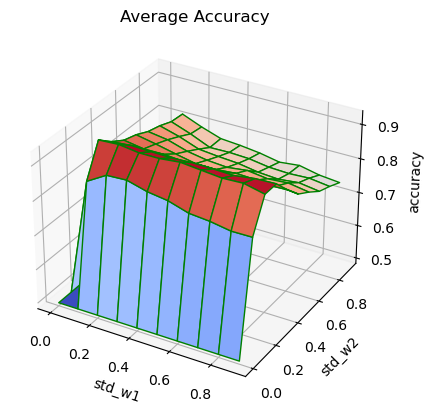

In [3]:
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_surface(std_w1_axis, std_w2_axis, average_accuracy_grid_10_by_10_10_samples, cmap ='coolwarm', edgecolor ='green')
ax.set_xlabel('std_w1')
ax.set_ylabel('std_w2')
ax.set_zlabel('accuracy')
ax.set_title('Average Accuracy')
fig.savefig("200_inputs_average_accuracy_grid_over_10_samples.png".format(sample))

In [4]:
# Find the best w1, w2 given the average accuracy of the grid

max_accuracy = np.max(average_accuracy_grid_10_by_10_10_samples)
index_max_accuracy = np.argmax(average_accuracy_grid_10_by_10_10_samples)
best_w1_w2 = np.unravel_index(index_max_accuracy, average_accuracy_grid_10_by_10_10_samples.shape)

In [5]:
best_w1_w2

(2, 2)

In [6]:
array_best_w1_best_w2 = np.array(best_w1_w2)*0.1

In [7]:
average_accuracy_grid_10_by_10_10_samples[2]

array([0.4921875 , 0.92734375, 0.93046875, 0.92265625, 0.92265625,
       0.92851562, 0.92265625, 0.91679687, 0.91914063, 0.90546875])

In [8]:
average_accuracy_grid_10_by_10_10_samples[:,2]

array([0.4921875 , 0.87148437, 0.93046875, 0.9       , 0.86289063,
       0.84960938, 0.83476562, 0.8171875 , 0.79804688, 0.7921875 ])

In [9]:
# Find the std of w1 with constant w2 and std of w2 with constant w1
std_dev_w1 = np.std(average_accuracy_grid_10_by_10_10_samples[2])
std_dev_w2 = np.std(average_accuracy_grid_10_by_10_10_samples[:,2])

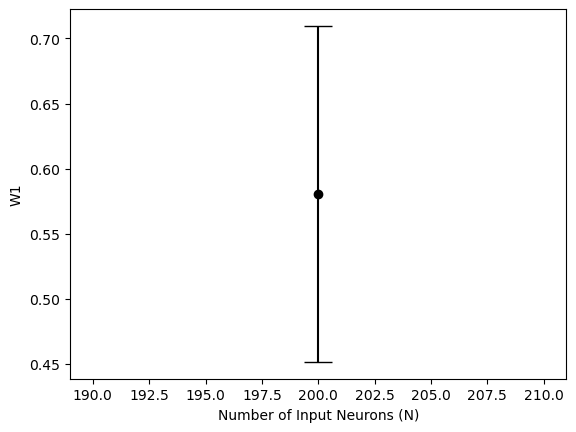

In [10]:
fig, ax = plt.subplots()
ax.scatter(200, array_best_w1_best_w2[0]/0.3445, color="k")
ax.errorbar(200, array_best_w1_best_w2[0]/0.3445, std_dev_w1/0.3445, capsize = 10.0, color= "k")
ax.set_xlabel("Number of Input Neurons (N)")
ax.set_ylabel("W1")
fig.savefig("input200forW1.png")

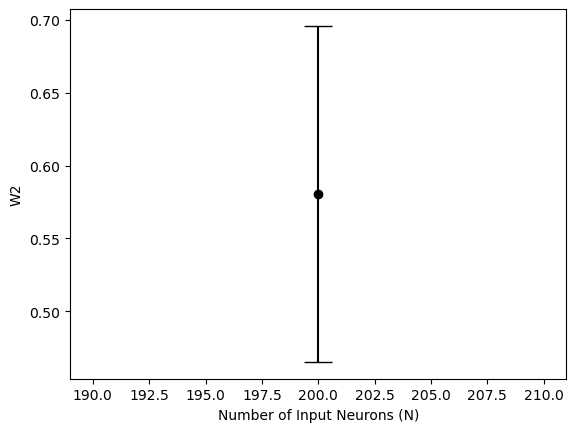

In [11]:
fig2, ax2 = plt.subplots()
ax2.scatter(200, array_best_w1_best_w2[1]/0.3445, color="k")
ax2.errorbar(200, array_best_w1_best_w2[1]/0.3445, std_dev_w2/0.3445, capsize=10.0, color= "k")
ax2.set_xlabel("Number of Input Neurons (N)")
ax2.set_ylabel("W2")
fig2.savefig("input200forW2.png")

In [12]:
data = {}
data['N'] = 200
data['w1'] = array_best_w1_best_w2[0]/0.3445
data['std_dev_w1_10_samples'] = std_dev_w1/0.3445
data['w2'] = array_best_w1_best_w2[1]/0.3445
data['std_dev_w2_10_samples'] = std_dev_w2/0.3445
np.savez("200_input_neurons_w1_w2.npz",**data)